In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
# renderer for jupyter notebook
pio.renderers.default='notebook'
# renderer for vs code
# pio.renderers.default='vscode'
# renderer for colab
# pio.renderers.default='colab'
pio.templates.default = "plotly_white"
import numpy as np
import statsmodels.api as sm
import datetime
from plotly.subplots import make_subplots
from ipywidgets import widgets,Layout
import warnings
warnings.simplefilter(action='ignore')
from yellowbrick.regressor import CooksDistance
import os

In [2]:
base_path='../viz/'

In [3]:
rain=pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions=list(rain.columns.values)[5:]
years=list(rain['year'].unique())
monsoon_list=[i for i in range(150,281)]
rain_monsoon=rain[rain['day-number'].isin(monsoon_list)]

In [4]:
rain=rain.set_index('date',drop=False)

In [5]:
def initial_plot(x_axis,region,df,iterate_list,title,x_axis_title,path,add_path=''):
#     list_type=year
    path=create_dir(path,region)
    if len(iterate_list)==0:
        traces=[]
        traces.append(go.Scatter(x=df[x_axis],y=df[region],name=region,line=dict(color='black', width=2,dash='dot')))
        layout = go.Layout(title=dict(text=title+'-'+region),xaxis=dict(title=x_axis_title,rangeslider=dict(visible=False)),yaxis=dict(title='Rainfall (mm)'),legend=dict(orientation="h"))
        go.FigureWidget(data=traces,layout=layout).write_image(path+add_path+'.jpeg')
    else:
        df=df[[region,'year','month','day-of-month','day-number']]
        for i in iterate_list:
            traces=[]
            temp = df[df['year'] == i]
            traces.append(go.Scatter(x=temp[x_axis],y=temp[region],name=str(i),line=dict(color='black', width=2,dash='dot')))
            layout = go.Layout(title=dict(text=title+'-'+region+'-'+str(i)),xaxis=dict(title=x_axis_title,rangeslider=dict(visible=False)),yaxis=dict(title='Rainfall (mm)'),legend=dict(
                        orientation="h"))
            go.FigureWidget(data=traces, layout=layout).write_image(path+add_path+'-'+str(i)+'.jpeg')

In [6]:
def create_dir(base,new_dir):
    path=base+new_dir+'/'
    if not os.path.exists(path):
        os.mkdir(path)
    return path

In [60]:
path=create_dir(base_path,'rain-observed-in-all-classification-daily-basis-monsoon')
for i in regions:
    g=initial_plot('day-number',i,rain_monsoon,years,'Rain observed on daily basis (monsoon time)','Day of year',path)

In [7]:
mean_monthly_year=rain.groupby(['year','month'],as_index=False).mean()
median_monthly_year=rain.groupby(['year','month'],as_index=False).median()

In [66]:
path=create_dir(base_path,'rain-observed-in-all-classification-monthly-basis-mean-median')
for i in regions:
    g_mean_monthly_year=initial_plot('month',i,mean_monthly_year,years,'Mean rain observed on monthly basis','Month',path,'mean')
    g_median_monthly_year=initial_plot('month',i,median_monthly_year,years,'Median rain observed on monthly basis','Month',path,'median')

In [8]:
mean_yearly=rain.groupby(['year'],as_index=False).mean()
median_yearly=rain.groupby(['year'],as_index=False).median()

In [86]:
path=create_dir(base_path,'rain-observed-in-all-classification-yearly-basis-mean-median')
for i in regions:
    g_mean_yearly=initial_plot('year',i,mean_yearly,[],'Mean rain observed on yearly basis','Year',path,'mean')
    g_median_yearly=initial_plot('year',i,median_yearly,[],'Median rain observed on yearly basis','Year',path,'median')

In [9]:
mean_daily=rain.groupby(['day-number'],as_index=False).mean()
median_daily=rain.groupby(['day-number'],as_index=False).median()

In [91]:
path=create_dir(base_path,'rainfall-day-wise-distribution-in-all-classification-full-year-mean-median')
for i in regions:
    g_mean_daily=initial_plot('day-number',i,mean_daily,[],'Mean distribution of Rainfall','Day of year',path,'mean')
    g_median_daily=initial_plot('day-number',i,median_daily,[],'Median distribution of Rainfall','Day of year',path,'median')

In [10]:
mean_daily_monsoon=rain_monsoon.groupby(['day-number'],as_index=False).mean()
median_daily_monsoon=rain_monsoon.groupby(['day-number'],as_index=False).median()

In [94]:
path=create_dir(base_path,'rainfall-day-wise-distribution-in-all-classification-monsoon-time-mean-and-median')
for i in regions:
    g_mean_daily_monsoon=initial_plot('day-number',i,mean_daily_monsoon,[],'Mean distribution of Rainfall (monsoon time)','Day of year',path,'mean')
    g_median_daily_monsoon=initial_plot('day-number',i,median_daily_monsoon,[],'Median distribution of Rainfall (monsoon time)','Day of year',path,'median')

In [11]:
dict_rain_regions = {}
dict_rain_monsoon_regions = {}

dict_rain_regions_yearly = {}
dict_rain_regions_monthly = {}
dict_rain_regions_year_monthly = {}

dict_rain_monsoon_regions_yearly = {}
dict_rain_monsoon_regions_monthly = {}
dict_rain_monsoon_regions_year_monthly = {}

for i in regions:
    dict_rain_regions[i] = rain[['year', 'day-number', 'date', 'month',
                                 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_monsoon_regions[i] = rain_monsoon[['year', 'day-number',
                                                 'date', 'month', 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_regions_yearly[i] = dict_rain_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_regions_monthly[i] = dict_rain_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i] = dict_rain_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i]['year'] = dict_rain_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_regions_year_monthly[i]['month'] = dict_rain_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_regions_year_monthly[i]['month']

    dict_rain_monsoon_regions_yearly[i] = dict_rain_monsoon_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_monsoon_regions_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i]['year'] = dict_rain_monsoon_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['month'] = dict_rain_monsoon_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_monsoon_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_monsoon_regions_year_monthly[i]['month']

In [12]:
def plot_box_dot(dict_df,x_axis,title1,title2,path):
    for i in regions:
        file=create_dir(path,i)
        fig=go.Figure()
        fig2=go.Figure()
        fig.add_trace(go.Box(y=dict_df[i][i],name=i))
        fig2.add_trace(go.Scatter(x=dict_df[i][x_axis],y=dict_df[i][i],mode='markers',name=i,line=dict(color='black', width=2)))
        fig.update_layout(title_text=title1,
                              xaxis_title='Regions', yaxis_title='Rainfall (mm)',showlegend=False)
        fig2.update_layout(title_text=title2,
                              xaxis_title=str(x_axis), yaxis_title='Rainfall (mm)',legend_orientation='h')
        fig.write_image(file+x_axis+'-box.jpeg')
        fig2.write_image(file+x_axis+'-dot.jpeg')

In [13]:
path=create_dir(base_path,'box-dot-plot')
plot_box_dot(dict_rain_regions_yearly,'year','Rainfall distribution of all the regions (yearly)','Year wise rainfall distribution of all the regions',path)
plot_box_dot(dict_rain_regions_monthly,'month','Rainfall distribution of all the regions (cumulative months)','Year wise rainfall distribution of all the regions',path)
plot_box_dot(dict_rain_regions_year_monthly,'year-month','Rainfall distribution of all the regions (monthly)','Year wise rainfall distribution of all the regions',path)

plot_box_dot(dict_rain_monsoon_regions_yearly,'year','Rainfall distribution of all the regions (monsoon)(yearly)','Month wise rainfall distribution of all the regions (monsoon)',path)
plot_box_dot(dict_rain_monsoon_regions_monthly,'month','Rainfall distribution of all the regions (monsoon) (cumulative months)','Cumulative month wise rainfall distribution of all the regions (monsoon)',path)
plot_box_dot(dict_rain_monsoon_regions_year_monthly,'year-month','Rainfall distribution of all the regions (monsoon) (monthly)','Month wise rainfall distribution of all the regions (monsoon)',path)

In [42]:
def plot_cooks_distance(dict_df,title,path,monsoon=''):
    for i in regions:
        file=create_dir(path,i)
        print(i,'-',title)
        vis=CooksDistance()
        vis.fit(dict_df[i].index.to_numpy().reshape(-1,1),dict_df[i][i])
        if monsoon:
            vis.show().get_figure().savefig(file+monsoon+'-'+title+'.jpeg',dpi=200,format='jpeg',transparent=True,facecolor='#ffffff',edgecolor='#ffffff')
        else:
            vis.show().get_figure().savefig(file+title+'.jpeg',dpi=200,format='jpeg',transparent=True,facecolor='#ffffff',edgecolor='#ffffff')
        if i=='baran':
            break

ajmer - yearly


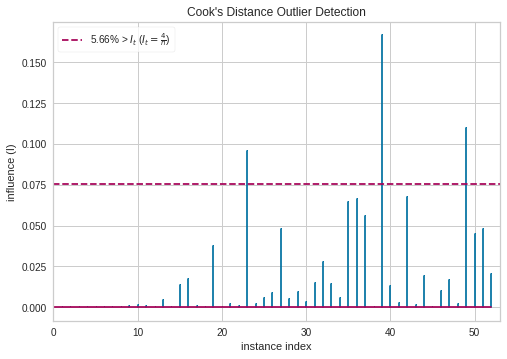

alwar - yearly


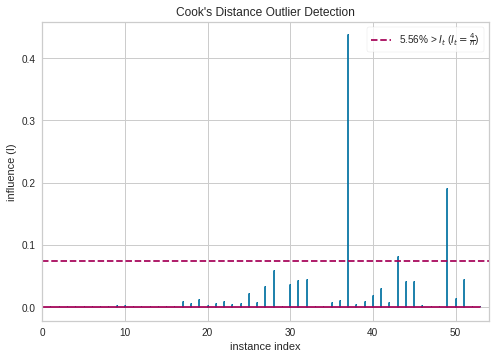

banswara - yearly


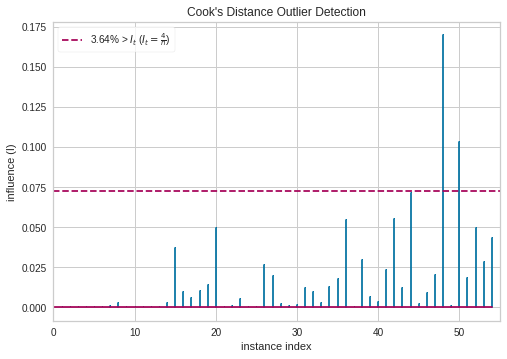

baran - yearly


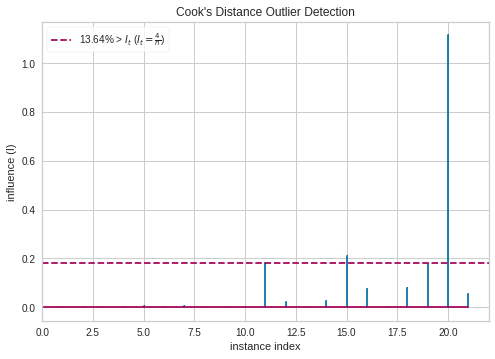

ajmer - cumulative-months


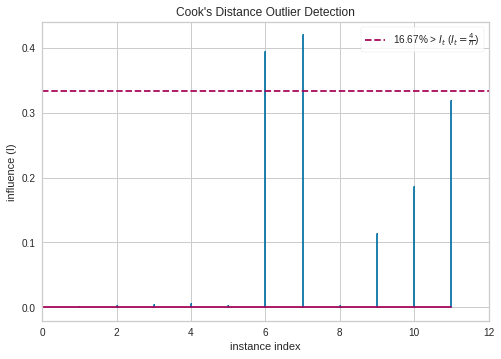

alwar - cumulative-months


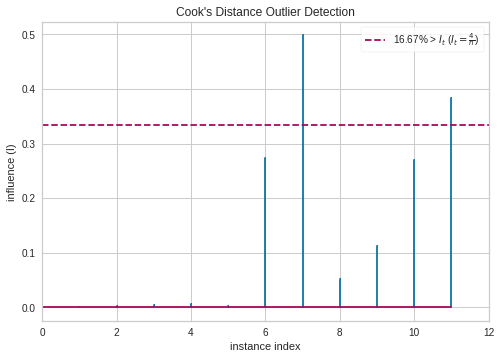

banswara - cumulative-months


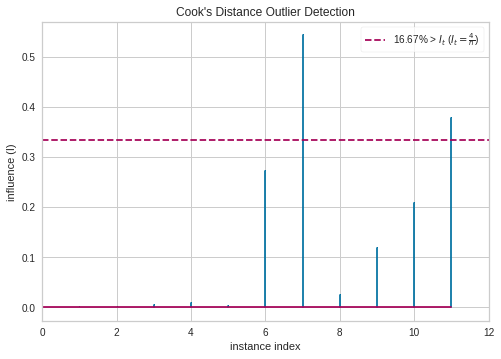

baran - cumulative-months


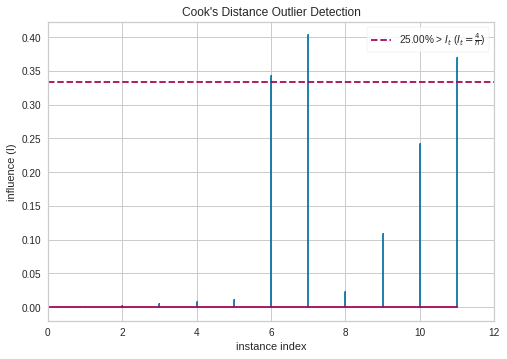

ajmer - monthly


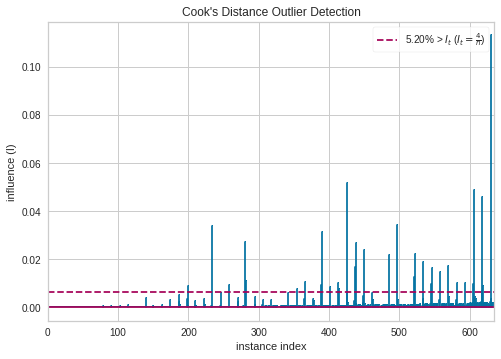

alwar - monthly


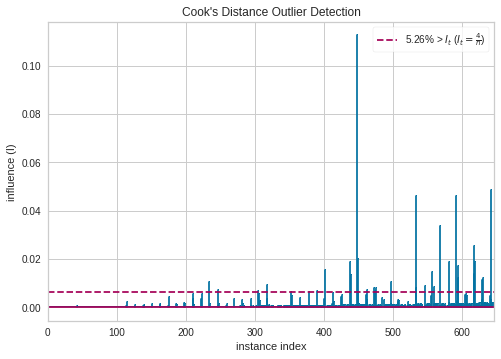

banswara - monthly


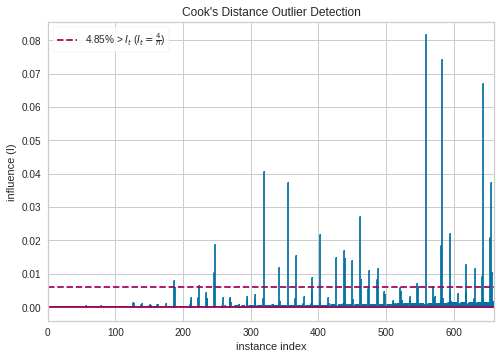

baran - monthly


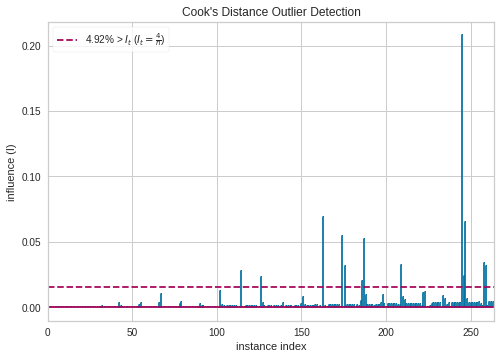

ajmer - yearly


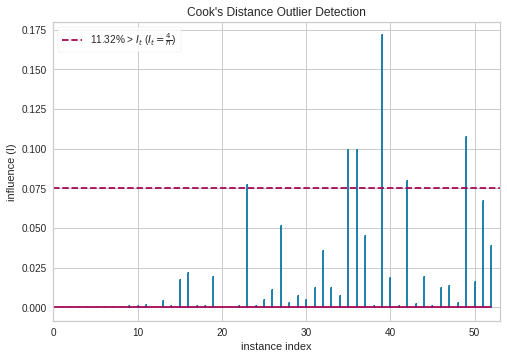

alwar - yearly


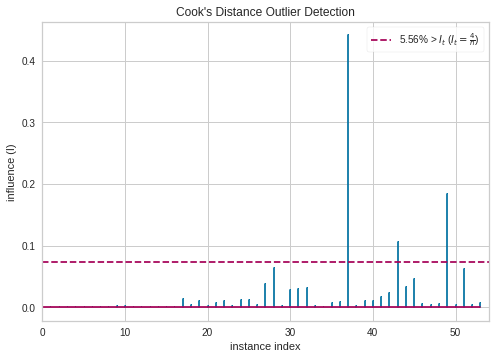

banswara - yearly


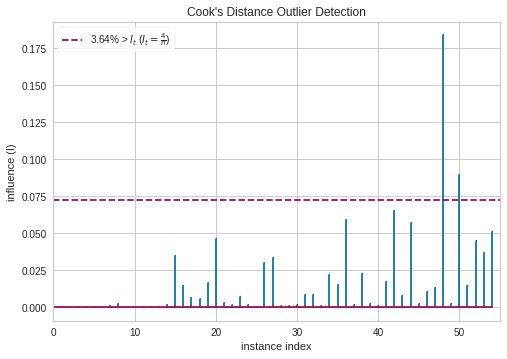

baran - yearly


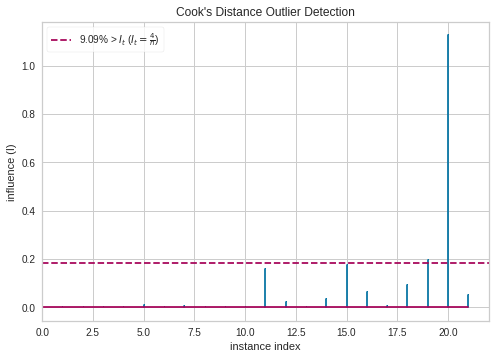

ajmer - cumulative-months


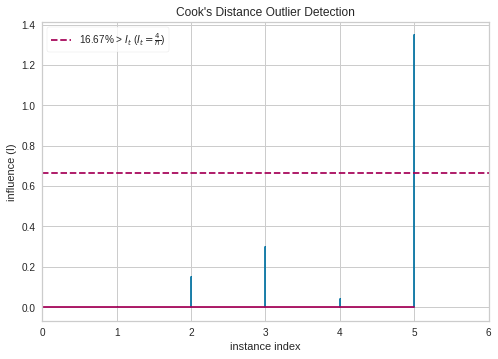

alwar - cumulative-months


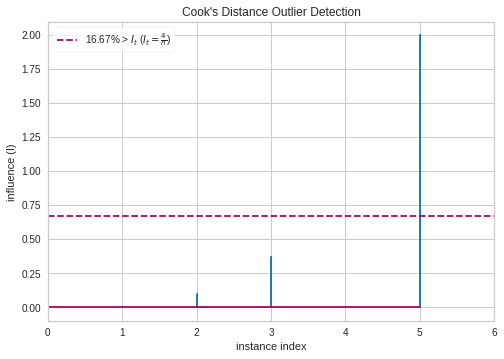

banswara - cumulative-months


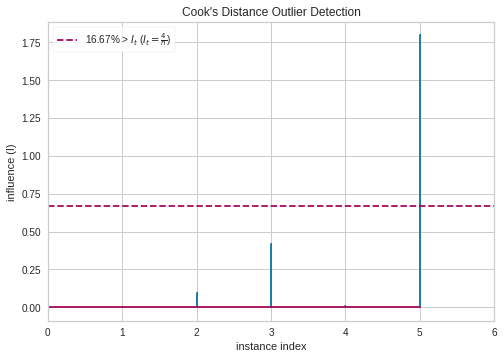

baran - cumulative-months


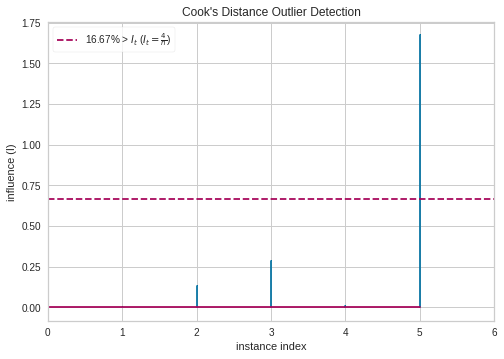

ajmer - monthly


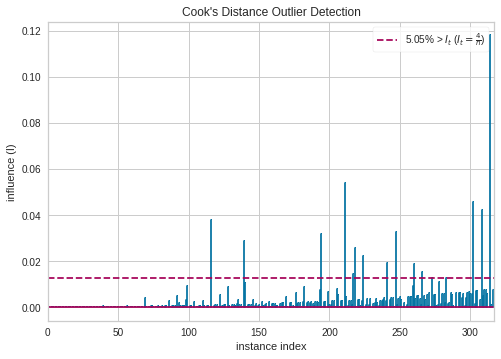

alwar - monthly


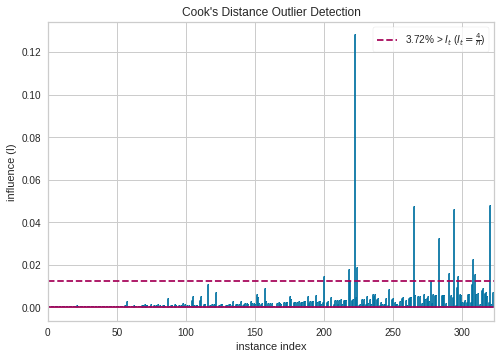

banswara - monthly


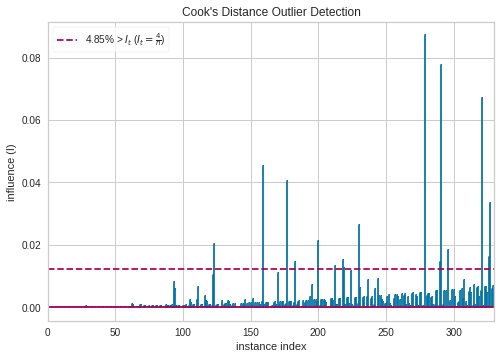

baran - monthly


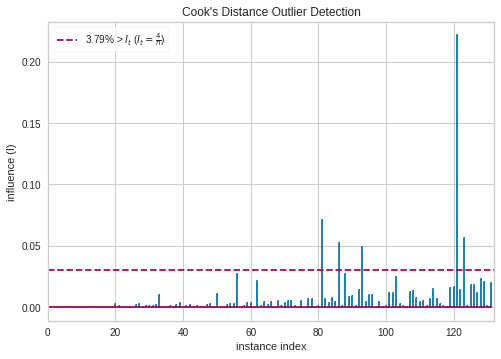

In [43]:
path=create_dir(base_path,'cooks-distance')
plot_cooks_distance(dict_rain_regions_yearly,'yearly',path)
plot_cooks_distance(dict_rain_regions_monthly,'cumulative-months',path)
plot_cooks_distance(dict_rain_regions_year_monthly,'monthly',path)

plot_cooks_distance(dict_rain_monsoon_regions_yearly,'yearly',path,'monsoon')
plot_cooks_distance(dict_rain_monsoon_regions_monthly,'cumulative-months',path,'monsoon')
plot_cooks_distance(dict_rain_monsoon_regions_year_monthly,'monthly',path,'monsoon')